# Anotações e um projeto com Árvore de Decisão em Python


- Tentarei focar na prática e dispensar um pouco a teoria com fórmulas. Entretanto, se for algo que vejo que é útil para o entendimento, com certeza entretará;

- Terá um exemplo de regressão e classificação;

- LinkedIn: https://www.linkedin.com/in/rafael-barbosa0/

- Github: https://github.com/barbosarafael


<p align="center">
  <img alt="decision_tree" src="https://i1.wp.com/www.vooo.pro/insights/wp-content/uploads/2016/12/RDS-Vooo_insights-Tutorial_arvore_de_decisao_02.jpg?resize=768%2C446&ssl=1" alt="drawing" width="600" height="400"/>
  <br>
    <em> <b>Retirado de:</b> https://www.vooo.pro/insights/um-tutorial-completo-sobre-a-modelagem-baseada-em-tree-arvore-do-zero-em-r-python/ </em>
</p>




# 1. Introdução

---

- É um modelo de aprendizado de máquina **supervisionado** que serve tanto para classificação quanto para regressão, isto é, precisam de variáveis explicativas para prever uma variável target;

- Também serve como visualização para tomada de decisões, já que ela parece um fluxograma;

- As variáveis explicativas podem ser de qualquer tipo, seja ela quantitativa ou qualitativa;


# 2. Terminologia

---


1. **Nó raiz**: O ponto de partida de toda árvore (mais pra frente vemos como é feita a escolha desta variável), ele possui maior nível hierárquico e faz a ligação inicial para outros elementos;

2. **Divisão**: É o processo de dividir um nó em dois ou mais sub-nós;

3. **Nó de decisão**: Quando dividimos os nós (ou sub-nós) em sub-nós adicionais, através da condição **se, então**;

4. **Folha ou nó de término**: São os nós em que não ocorrem mais divisões, estes podem ser os últimos da árvore e contém um valor contínuo ou categórico (a categoria final escolhida);

5. **Poda**: Processo de remover alguns dos elementos da árvore final, podendo ser nós, sub-nós, etc.

6. **Nó pai e filho**: Nó divido entre sub-nós. O nó é chamado de pai e os sub-nós chamados de filhos.

> Resumo: A árvore armazena regras em seus nós (**se, então**) e, baseado nas regras, temos uma decisão que será armazenada na **folha ou nó de término**.



# 3. Construção da árvore, Divisão dos nós e Impureza

---


<p align="center">
  <img alt="decision_tree" src="https://www.model-railroad-infoguy.com/images/suncoasttree.jpg" alt="drawing" width="300" height="300"/>
  <br>
    <em> <b>Retirado de:</b> https://www.model-railroad-infoguy.com/trees.html </em>
</p>


- Ela particiona o espaço gerado pelas variáveis explicativas ($ X_i $) em algumas regiões para que estas partições sejam as mais puras possíveis;

- A árvore divide os nós em todas as variáveis que estão disponíveis e seleciona uma partição que resulta em sub-nós mais homogêneos (relacionados a pureza);

- **Pureza**: Se todos os elementos pertencem a uma única classe/categoria então ele é chamado de puro;

- Devido a profundidade e a divisão da árvore, ela pode aprender demais e acabar sofrendo o **overfitting** (quando o modelo aprende o padrão total/perfeito dos dados nos dados de treino e quando pedimos para testar em dados diferentes acaba por dar erros absurdos);

- Esse problema pode ser contornado a partir da **poda** da árvore e sobre o controle dos parâmetros;

- Podemos controlar a pureza por meio de 4 métodos:

  1. Índice Gini;
  2. Entropia e Ganho de informação;
  3. Qui quadrado;
  4. Redução na variância.

- No presente notebook, explico somente as primeiras duas, sendo elas as mais conhecidas e implementadas nos softwares atuais.


## 3.1. Índice de Gini

- Mede o grau de homogeneidade dos dados. Por isso, pode ser usado para calcular a pureza dos nós;

- Em um determinado nó (podendo ser raiz ou divisão qualquer), o índice é dado por:

$$ IG = 1 - \sum_{i = 1}^{c} p_{i}^{2} $$

onde $ p_{i} $ é a frequência de cada categoria em cada nó e c o número de categorias.

- Quando o IG é 0, indica que todos as observações pertencem a somente uma categoria ou existe somente uma;

- Quando se aproxima de 1, indica que as observações são distribuídas aleatoriamente nas categorias;

- Quando o valor é de 0,5 indica que as observações são igualmente distribuídas nas categorias;

- Executa divisões binárias, isto é, vai para esquerda ou direita;

## 3.2. Entropia e Ganho de Informação

- A Entropia caracteriza a impureza dos dados, sendo também uma medida de verificação de homogeneidade dos dados em relação a sua classificação;

- Novamente o conceito de **pureza**: Se todos os elementos pertencem a uma única classe/categoria então ele é chamado de puro;

- Quanto mais puro é um nó, menor a quantidade de informação que ele precisa para ser descrito e vice-versa;

- Por meio da teoria da informação, podemos medir esse grau de desorganização/impureza que é a entropia. A fórmula é dada por 

$$ Entropia(S) = \sum_{i = 1}^{c} - p_i \log_{2}(p_i) $$

- Podemos notar a partir do gráfico que:

  - Se a entropia for completamente homogênea, a entropia será 0 (extremidades);

  - Se as categorias possuem a mesma probabilidade, isto é 50/50, então a entropia será 1 (máxima);


<p align="center">
  <img alt="decision_tree" src="https://sites.google.com/site/mansoldo1986/_/rsrc/1472876171683/home/leavesphp/classificacao-por-arvores-de-decisao/criteriodeselecaodeatributos/entropia%20graph1.jpg
" alt="drawing" width="400" height="300">
  <br>
    <em> <b>Retirado de</b>: https://sites.google.com/site/mansoldo1986/home/leavesphp/classificacao-por-arvores-de-decisao </em>
</p>


- O ganho de informação pode ser baseado na entropia. Nesse caso, **há um ganho de informação quando em alguma divisão dos nós nos retorna uma redução na entropia**;

- Se as probabilidades para o evento tenderem a somente uma categoria da variável, i.e. 99% de chance para categoria1 e 1% para categoria2, então teremos quase **nenhum ganho de informação** pois já sabemos que é bastante provavel uma categoria;

- Se as probabilidade para as mesmas categorias serem um pouco mais iguais, i.e. 60/40, 50/50, 55/45, etc, temos uma "surpresa" em um possível resultado, pois não sabemos realmente qual categoria será a escolhida. Logo, teremos um **ganho de informação**. 

- Novamente, o ganho de informação é baseado na redução da entropia após a contrução de um nó. O ideal é que os nós sejam os mais homogêneos possíveis para que eles nos retornem um maior ganho de informação, logo uma menor entropia.


# 4. *Overfitting*

---


<p align="center">
  <img alt="decision_tree" src="https://miro.medium.com/max/1400/1*cdvfzvpkJkUudDEryFtCnA.png" width="700" height="300">
  <br>
    <em> <b>Retirado de</b>: https://medium.com/@srjoglekar246/overfitting-and-human-behavior-5186df1e7d19 </em>
</p>


- Como podemos observar na Figura acima, o overfitting é o problema que temos quando o modelo aprende demais o padrão nos dados de treino, tendo erro quase nulo, e em dados novos o erro acaba por aumentar absurdamente;

- Em modelos de árvore, se não controlarmos seus parâmetros, ela simplesmente irá criar uma folha (atributo final) para cada observação, fazendo com que árvore seja imensa, englobando todas as possibilidades, como no exemplo abaixo;


<p align="center">
  <img alt="decision_tree" src="https://i.stack.imgur.com/otsP3.png" width="400" height="300">
  <br>
    <em><b>Retirado de</b>: https://stats.stackexchange.com/questions/230581/decision-tree-too-large-to-interpret</em>
</p>

- Podemos contornar esse problema de *overfitting* na árvore de duas maneiras:

  - Controlando os parâmetros da árvore de decisão (antes ou depois da aplicação do modelo);
  
  - Podando a árvore (após a aplicação do modelo).

## 4.1. Parâmetros da árvore de decisão

- Estes parâmetros nos dizem ao tamanho da nossa árvore;

- Utilizaremos os conceitos do `sklearn` em Python;

### 4.1.1. Max_depth

- Maior profundidade permitida da árvore de decisão verticalmente;

- Conforme o número deste parâmetro aumenta, a complexidade da árvore também, junto com a possibilidade de overfitting. Já que a árvore será "grande" e irá aprender todos os padrões dos dados;

- O valor **default** deste parâmetro no `sklearn` é de None (Nenhum) mas é controlado por outro parâmetro chamado de `min_samples_split`.

### 4.1.2. Min_samples_split

- Número mínimo de amostras/observações para dividir um nó;

- O valor **default** deste parâmetro no `sklearn` é de 2 observações, isto é, 
a partir de 2 observações já pode dividir em um nó;

### 4.1.3. Min_samples_leaf

- Número mínimo de amostras/observações necessárias para o último nó (folha);

- O valor **default** deste parâmetro no `sklearn` é de 1 observação;

- Deve-se deixar pelo menos 1 observação em cada um dos ramos, seja ele esquerdo ou direito, para ser um ponto de divisão (como vimos no parâmetro acima);

### 4.1.4. max_features

- Número de variáveis/features utilizadas para tomar a decisão (esquerda ou direita);

- Dado que é **difícil ou custoso** olhar para todos os seus dados e variáveis em todas as divisões, se você tiver 35 variáveis e setar esse parâmetro como 10, ele selecionará 10 variáveis aleatoriamente para escolher a próxima divisão, e assim por diante;

- O valor **default** deste parâmetro no `sklearn` é "Nenhum". Logo, ele irá todos seus dados, mas existem opções, elas são:

  - "Auto", então max_features = $ \sqrt{n\_features} $.

  - "Sqrt", então max_features = $ \sqrt{n\_features} $.

  - "log2", então max_features = $ \log_{2}(n\_features) $.

  - "None", então max_features = n_features.

## 4.2. Poda da Árvore (Pruning)

- Pré-podagem: Parar o crescimento da árvore mais cedo;

- Pós-podagem: Acontece quando a árvore já está completa;

- Pode ser feito da seguinte maneira:

  1. Percorre a ávore em profundidade;

  2. Para cada nó de decisão, calcula: 

    - Erro do nó;

    - Soma dos erros dos nós descendentes.

  3. Se o erro do nó é menor ou igual à soma dos erros dos nós descendentes então o nó é transformado em folha. 

- Valorizando a pureza;

- Na pós-podagem, a sub-árvore com melhor desempenho é escolhida;

- Segundo este [link](https://www.vooo.pro/insights/um-tutorial-completo-sobre-a-modelagem-baseada-em-tree-arvore-do-zero-em-r-python/), no `sklearn` não existe a implementação da podageme, entretanto no R tem a função `prune` do pacote `rpart`.

# 5. Quando utilizar modelos baseados em árvore ?

---

- Quando a relação das variáveis explicativas com a target não é linear;

- Uma segunda opinião, segundo o [Mário Filho](https://www.mariofilho.com/). Na dúvida entre modelos, teste todos.

# 6. Aplicação da Árvore de **Regressão** em Python

---

<p align="center">
  <img alt="decision_tree" src="https://www.chevrolet.com.br/content/dam/chevrolet/mercosur/brazil/portuguese/index/cars/cars-subcontent/segmento-carros/02-images/onix-premier.png" width="700" height="400">
  <br>
    <em> Imagem aleatória de um carro qualquer para representar nosso banco de dados. <b>Retirado de</b>: https://www.chevrolet.com.br/carros </em>
</p>

O nosso banco de dados diz respeito a carros usados do site  www.cardekho.com, e pode ser achado neste [link](https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho). Entretanto, salvei no meu githut para melhor carregá-lo.

As variáveis que temos disponíveis são: 

1. Car_Name: Nome do carro;
2. Year: Ano de fabricação;
3. **Selling_Price (Target)**: Preço de venda;
4. Present_Price: Preço atual;
5. Kms_Driven: Quantos KMs o carro já percorreu;
6. Fuel_Type: Tipo de gasolina;
7. Seller_Type: Tipo de vendedor;
8. Transmission: Câmbio manual ou automático;
9. Owner: Proprietário.

## 6.1. Análise Exploratória dos Dados

- Por ser um mini-tutorial sobre árvore de decisão, não irei aprofundar sobre o dataset;

- A EDA será univariada.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-muted")
%matplotlib inline
pd.set_option('display.max_columns', None)

In [41]:
banco = pd.read_csv(filepath_or_buffer = "https://raw.githubusercontent.com/barbosarafael/Anotacoes/master/ML_Modelos/Arvore_de_decisao/car_data.csv")

banco.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


- Podemos, por meio das informações abaixo, verificar que o preço de venda possui grande parte dos valores abaixo de sua mediana;

- Alguns valores estão na cauda a direita, provavelmente, indicando que são **outliers**;

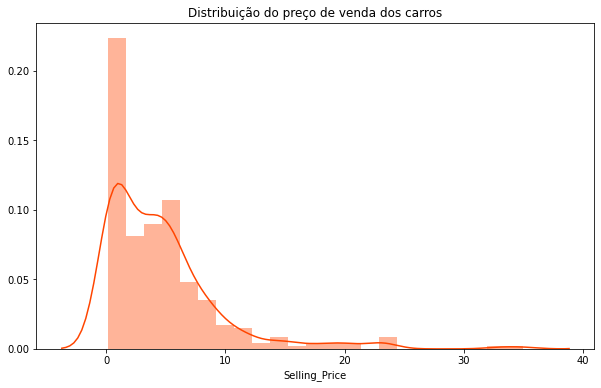

In [42]:
plt.figure(figsize = [10, 6])

sns.distplot(banco["Selling_Price"], hist = True, color = "orangered")

plt.title("Distribuição do preço de venda dos carros")
plt.show()

- Podemos observar que a escala de valores para as variáveis de preço devem estar em $ valor \times 10^n $, onde n é algum valor entre 3 a 6;

- Não sou nenhum especialista em carros, mas o valor máximo de 500.000 kms rodados para um carro usado é relativamente alto;

- Podemos ter uma relação entre Kms pecorridos e os preços;

- E, também, provavelmente os preços serão correlacionados;

- A variável de Kms percorridos possui alta variação.

In [43]:
var_quant = ["Selling_Price", "Present_Price", "Kms_Driven"]

banco[var_quant].describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Selling_Price,301.0,4.66,5.08,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.63,8.64,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.21,38886.88,500.00,15000.0,32000.0,48767.0,500000.0


- Por meio da matriz de correlação é perceptível a correlação entre as variáveis de preço, logo, **a variável `Present_Price` será excluída do banco**;

- Diferente da hipótese que mencionei acima de que provavelmente iria ter uma correlação negativa entre o preço de venda e a km do carro usado, na verdade nem negativa ela é.;

- Apesar de fraca é positiva, isto é, as variáveis são diretamente proporcionais, claro, que temos que mencionar que a relação linear entre elas é fraca.

In [44]:
banco[var_quant].corr().round(4)

,Selling_Price,Present_Price,Kms_Driven
Selling_Price,1.0000,0.8790,0.0292
Present_Price,0.8790,1.0000,0.2036
Kms_Driven,0.0292,0.2036,1.0000


- Para a variável **Fuel_Type**:

  - Petrol deve ser gasolina;
  - A categoria Petrol engloba a maioria das informações desta variável;
  - As demais categorias somam, aproximadamente, 20% das demais informações, logo, irei fazer uma simples transformação concatenando a categoria Diesel e CNG.

- Para a variável **Seller_Type**, temos:

  - A categoria que possui mais informações é a de Dealer (revendedores);
  - Por ser uma variável que possui uma separação relativamente OK entre as categorias, ela não irá ser transformada.

- Para a variável **Transmission**:

  - Assim como a anterior, possui uma separação um pouco OK, apesar de tender bastante para a categoria *Manual*, mas também não será necessária nenhuma transformação;

- Para a variável **Owner**:

  - Nessa variável não sabemos o que representa cada categoria;
  - Entretanto, a categoria 0 é a que maior possui informação massiva dentro de nosso banco de dados (96,35%)
  - Assim como na variável **Fuel_type**, as demais categorias, que não somam nem 4% dos nossos dados, serão agrupadas em somente uma.

In [45]:
var_qual = banco[["Fuel_Type", "Seller_Type", "Transmission", "Owner"]]

for i in var_qual:

  print(banco[i].value_counts(normalize = True).mul(100).round(2))
  print(15 * "---")


Petrol    79.40
Diesel    19.93
CNG        0.66
Name: Fuel_Type, dtype: float64
---------------------------------------------
Dealer        64.78
Individual    35.22
Name: Seller_Type, dtype: float64
---------------------------------------------
Manual       86.71
Automatic    13.29
Name: Transmission, dtype: float64
---------------------------------------------
0    96.35
1     3.32
3     0.33
Name: Owner, dtype: float64
---------------------------------------------


## 6.2. Pré-processamento dos dados

- Nesta sub-seção iremos tratar os dados e fazer as manipulações para entrar no modelo da árvore de decisão.

### 6.2.1. Exclusão de variáveis

- Excluir as variáveis:

  - Car_Name	
  
  - Present_Price

In [46]:
banco = banco.drop(columns = ["Car_Name", "Present_Price"], axis = 1)

banco.head()

,Year,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,27000,Petrol,Dealer,Manual,0
1,2013,4.75,43000,Diesel,Dealer,Manual,0
2,2017,7.25,6900,Petrol,Dealer,Manual,0
3,2011,2.85,5200,Petrol,Dealer,Manual,0
4,2014,4.60,42450,Diesel,Dealer,Manual,0


### 6.2.2. Agrupamento de categorias

- Como mencionado anteriormente, algumas variáveis possuem categorias que correspondem a grande maioria do percentual;

- Logo, as demais não possuem tanta informação;

In [47]:
banco["Fuel_Type"] = banco["Fuel_Type"].apply(lambda x: 1 if x == "Petrol" else 0)

banco["Fuel_Type"].value_counts(normalize = True).mul(100).round(2)

1    79.4
0    20.6
Name: Fuel_Type, dtype: float64

In [48]:
banco["Owner"] = banco["Owner"].apply(lambda x: 0 if x == 0 else 1)

banco["Owner"].value_counts(normalize = True).mul(100).round(2)

0    96.35
1     3.65
Name: Owner, dtype: float64

In [49]:
banco.head()

,Year,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,27000,1,Dealer,Manual,0
1,2013,4.75,43000,0,Dealer,Manual,0
2,2017,7.25,6900,1,Dealer,Manual,0
3,2011,2.85,5200,1,Dealer,Manual,0
4,2014,4.60,42450,0,Dealer,Manual,0


### 6.2.3. Categorias de variáveis sendo números

- Os modelos do `sklearn` não aceitam variáveis que possuem strings como categorias;

- Ok, alguns com certeza aceitam mas provavelmente são os que envolvem texto como NLP, etc;

- Nesse caso, temos que transformar as categorias das variáveis para numéricas.

In [50]:
varcat_to_num = ["Seller_Type", "Transmission"]

banco[varcat_to_num] = banco[varcat_to_num].apply(lambda x: pd.factorize(x)[0])

banco.head()

,Year,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,27000,1,0,0,0
1,2013,4.75,43000,0,0,0,0
2,2017,7.25,6900,1,0,0,0
3,2011,2.85,5200,1,0,0,0
4,2014,4.60,42450,0,0,0,0


## 6.3. Divisão em treino e teste

- Neste caso iremos separar em 50/50 os dados;

In [51]:
from sklearn.model_selection import train_test_split

x = banco.drop("Selling_Price", axis = 1)
y = banco["Selling_Price"]


x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, train_size = 0.5, random_state = 1234)

print(x_treino.shape, y_treino.shape, x_teste.shape, y_teste.shape)

(150, 6) (150,) (151, 6) (151,)


## 6.4. Aplicação do modelo

- Vamos setar alguns parâmetros básicos:

  - Max_depth = 3;
  - Min_samples_split = Default;
  - Min_samples_leaf = Default;
  - max_features = Default.

In [70]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state = 1234, max_depth = 3)

dtr.fit(x_treino, y_treino)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1234, splitter='best')

- Agora com modelo pronto, podemos predizer para nossos dados de teste e verificar os erros;

In [71]:
y_pred = dtr.predict(x_teste)

y_pred[:6].round(2)

array([3.07, 0.63, 3.07, 0.63, 0.63, 0.63])

In [72]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_squared_error(y_teste, y_pred))
print(np.sqrt(mean_squared_error(y_teste, y_pred)))
print(mean_absolute_error(y_teste, y_pred))

9.911042627229685
3.1481808441113555
1.7509421493395003


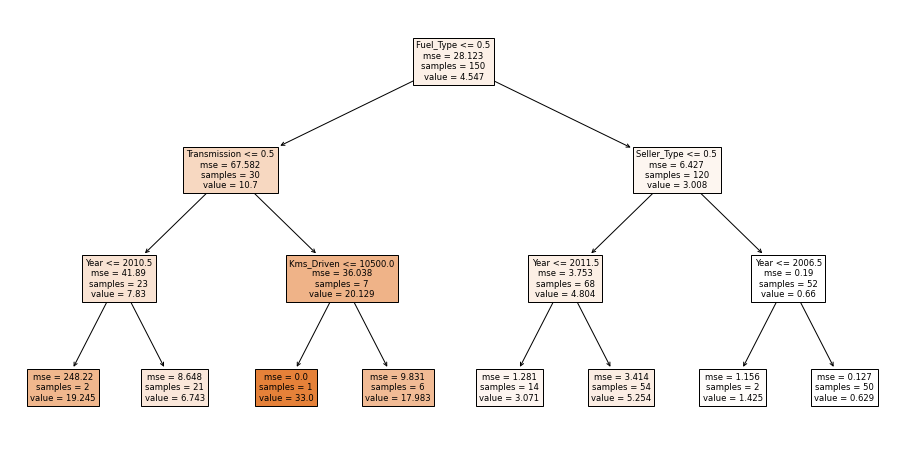

In [73]:
from sklearn.tree import plot_tree

var_names = list(x_treino.columns)

plt.figure(figsize = [16, 8])
plot_tree(dtr, filled = True, feature_names = var_names)
plt.show()

# Referências

---

1. Elements of Statistical Learning
2. Introdução à Ciência de Dados Fundamentos e Aplicações
3. https://medium.com/machine-learning-beyond-deep-learning/%C3%A1rvores-de-decis%C3%A3o-3f52f6420b69
4. https://www.wrprates.com/o-que-e-arvore-de-decisao-decision-tree-linguagem-r/
5. https://www.maxwell.vrac.puc-rio.br/7587/7587_4.PDF
6. https://edisciplinas.usp.br/pluginfile.php/4469825/mod_resource/content/1/ArvoresDecisao_normalsize.pdf
7. https://www.cin.ufpe.br/~pacm/SI/ArvoreDecisaoIndutiva.pdf
8. https://www.vooo.pro/insights/um-tutorial-completo-sobre-a-modelagem-baseada-em-tree-arvore-do-zero-em-r-python/
9. https://minerandodados.com.br/arvores-de-decisao-conceitos-e-aplicacoes/
10. https://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree
11. Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.
12. https://www.alura.com.br/conteudo/machine-learning-otimizacao-de-modelos-atraves-de-hiperparametros
13. https://gdcoder.com/decision-tree-regressor-explained-in-depth/